In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [3]:
def loss(y, y_sigpred):
    loss = -np.mean(y*(np.log(y_sigpred)) - (1-y)*np.log(1-y_sigpred))
    return loss

In [4]:

def gradients(X, y, y_sigpred):
    
    # X --> Input.
    # y --> true/target value.
    # y_sigpred --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
   
    m = X.shape[0]
    
    # Gradient Descent of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_sigpred - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_sigpred - y)) 
    
    return dw, db

In [5]:
def decision_boundary(w, b):

    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    
    m = -w[0]/w[1]
    c = -b/w[1]

    return m,c

In [6]:
def train(X, y, bs, iter, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # iter --> Number of iterations.
    # lr --> Learning rate.
        
    #rows,cols
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
   
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for loop_cnt in range(iter):
        
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_sigpred = sigmoid((np.dot(xb, w) + b))
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_sigpred)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
    
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [7]:
def predict(X,w,b):
    preds = sigmoid(np.dot(X, w) + b)
    
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [8]:
#Selecting Species 1 and Species 2 that is taking only Iris-setosa & Iris Versicolor
df12 = pd.read_csv("iris.csv",nrows=100)
df12['species'] = df12['species'].replace(['Iris-setosa'],0)
df12['species'] = df12['species'].replace(['Iris-versicolor'],1)
sp12=df12.values[:,[0,2]]
op12=df12.values[:,[4]]
op12=op12.flatten()

In [9]:
#Selecting Species 2 and Species 3 that is taking only Iris Versicolor and Iris-virginica
df23 = pd.read_csv("iris.csv",skiprows=50,nrows=100)
df23.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
df23['species'] = df23['species'].replace(['Iris-versicolor'],0)
df23['species'] = df23['species'].replace(['Iris-virginica'],1)
sp23=df23.values[:,[0,2]]
op23=df23.values[:,[4]]
op23=op23.flatten()

In [10]:
#Selecting Species 1 and Species 3 that is taking only Iris-setosa and Iris-virginica
df13 = pd.read_csv("iris-13.csv",nrows=100)
df13['species'] = df13['species'].replace(['Iris-setosa'],0)
df13['species'] = df13['species'].replace(['Iris-virginica'],1)
sp13=df13.values[:,[0,2]]
op13=df13.values[:,[4]]
op13=op13.flatten()

In [11]:
w12, b12, l12 = train(sp12,op12, bs=100, iter=1000, lr=0.01)
m12,c12 = decision_boundary( w12, b12)

In [12]:
w23, b23, l23 = train(sp23,op23 ,bs=100, iter=1000, lr=0.01)
m23,c23 = decision_boundary( w23, b23)

In [13]:
w13, b13, l13 = train(sp13,op13 ,bs=100, iter=1000, lr=0.01)
m13,c13 = decision_boundary( w13, b13)

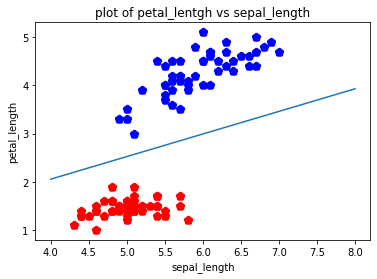

In [14]:
#Classifier showing the separating surface for species 1,2
plt.scatter(sp12[:50,0], sp12[:50,1], marker="*",color="red", s=20, linewidths=5)
plt.scatter(sp12[50:100,0],sp12[50:100,1], marker="*",color="blue", s=20, linewidths=5)
plt.title('plot of petal_lentgh vs sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
inp=[i for i in range(4,9,1)]
plt.plot(inp, m12*inp+c12)
plt.show()

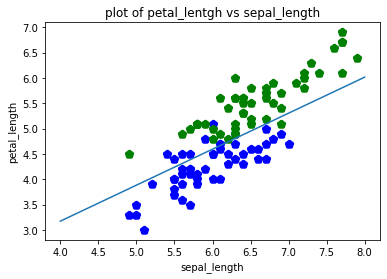

In [15]:
#Classifier showing the separating surface for species 2,3
plt.scatter(sp12[50:100,0],sp12[50:100,1], marker="*",color="blue", s=20, linewidths=5)
plt.scatter(sp23[50:100,0],sp23[50:100,1], marker="*",color="green", s=20, linewidths=5)
plt.title('plot of petal_lentgh vs sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
inp=[i for i in range(4,9,1)]

plt.plot(inp, m23*inp+c23)
plt.show()

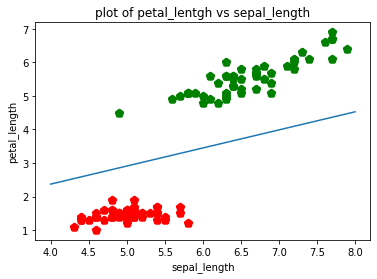

In [16]:
#Classifier showing the separating surface for species 1,3
plt.scatter(sp12[:50,0], sp12[:50,1], marker="*",color="red", s=20, linewidths=5)
plt.scatter(sp23[50:100,0],sp23[50:100,1], marker="*",color="green", s=20, linewidths=5)
plt.title('plot of petal_lentgh vs sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
inp=[i for i in range(4,9,1)]
plt.plot(inp, m13*inp+c13)
plt.show()

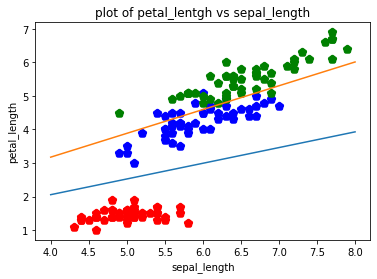

In [17]:
#Classifier showing the separating surfaces for species 1,2,3
plt.scatter(sp12[:50,0], sp12[:50,1], marker="*",color="red", s=20, linewidths=5)
plt.scatter(sp12[50:100,0],sp12[50:100,1], marker="*",color="blue", s=20, linewidths=5)
plt.scatter(sp23[50:100,0],sp23[50:100,1], marker="*",color="green", s=20, linewidths=5)
plt.title('plot of petal_lentgh vs sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
inp=[i for i in range(4,9,1)]
plt.plot(inp, m12*inp+c12)
plt.plot(inp, m23*inp+c23)
plt.show()

<h2>Observations</h2>

In [18]:

print("The values of the slopes and intercepts of the separating surfaces are as :")
print("Line 1 separating 1 and 2 slope =",m12,"intercept = ",c12)
print("Line 2 separating 2 and 3 slope =",m23,"intercept = ",c23)
print("Line 3 separating 1 and 3 slope =",m13,"intercept = ",c13)

The values of the slopes and intercepts of the separating surfaces are as :
Line 1 separating 1 and 2 slope = [0.46867991] intercept =  [0.17983901]
Line 2 separating 2 and 3 slope = [0.71030539] intercept =  [0.33327264]
Line 3 separating 1 and 3 slope = [0.53956553] intercept =  [0.21152918]


In [19]:
#Accuracy Testing 
crct=0
for i in range(100):
    if op12[i]==predict(sp12[i],w12,b12):
        crct+=1

print("Accuracy=",crct*100/100)

Accuracy= 100.0


In [20]:
#Accuracy Testing 
crct=0
for i in range(100):
    if op23[i]==predict(sp23[i],w23,b23):
        crct+=1

print("Accuracy=",crct*100/100)

Accuracy= 90.0


In [21]:
#Accuracy Testing 
crct=0
for i in range(100):
    if op13[i]==predict(sp13[i],w13,b13):
        crct+=1

print("Accuracy=",crct*100/100)

Accuracy= 100.0
